BÀI TẬP TRÊN LỚP

6 [[ 0  1 -1]]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


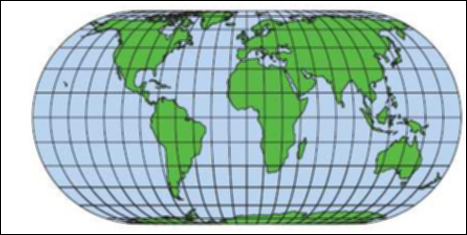

In [ ]:
import numpy as np
signals = np.array([[1,2],[3,4],[10,0]])
sample = np.array([3,-1])
np.inner(signals, sample)
#ứng dụng 1
import numpy as np
A = np.array([0,0,-1,2,3,-1,0,1,-1,-1])
search_vector = np.array([0,1,-1])
len(A),  len(search_vector)
B = np.array([1])
B = np.resize(B, (len(A)-len(search_vector)+1, len(search_vector)))
B = np.asmatrix(B)
for i in range(len(A)-len(search_vector)+1):
 for j in range(len(search_vector)):
  B[i,j] = A[i+j]
C = np.inner(B, search_vector)
for i in range(len(A)-len(search_vector)+1):
 if ( C[0,i] == np.inner(search_vector, search_vector) ):
  print (i, B[i])
# ứng dụng 2
from google.colab import drive
drive.mount('/content/drive')

from PIL import Image, ImageDraw

img = Image.open('/content/drive/My Drive/traidat.png')
img = img.convert("RGB")
new_width = int(img.width / 2)
new_height = int(img.height / 2)
new_img = img.resize((new_width, new_height), resample=Image.LANCZOS)
new_img.save('/content/drive/My Drive/traidat_small.png')

input_image = Image.open('/content/drive/My Drive/traidat.png')
input_pixels = input_image.load()
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]]
kernel = box_kernel
offset = len(kernel) // 2
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                acc[0] += pixel[0] * kernel[a][b]
                acc[1] += pixel[1] * kernel[a][b]
                acc[2] += pixel[2] * kernel[a][b]
        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))

output_image.save('/content/drive/My Drive/traidat_lammo.png')

from IPython.display import Image as ColabImage
ColabImage('/content/drive/My Drive/traidat_lammo.png')


In [ ]:
import numpy as np
A = np.array([[0,0,1.0/2, 1.0/2],
    [1.0/3,0,0,0],
    [1.0/3,0,0,1.0/2],
    [1.0/3,1.0,1.0/2,0]])
x = np.array([1,1,1,1])
x = np.dot(A, x)
print (x)

[1.         0.33333333 0.83333333 1.83333333]


BÀI TẬP VỀ NHÀ

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


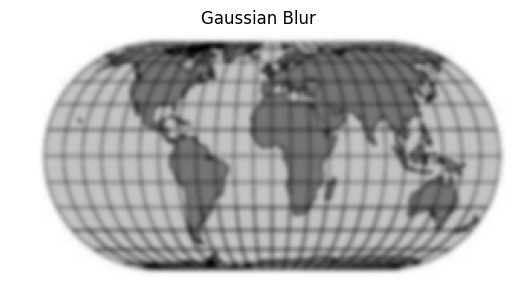

In [29]:
from google.colab import drive
import cv2
import numpy as np
from matplotlib import pyplot as plt

drive.mount('/content/drive')

image = cv2.imread('/content/drive/My Drive/traidat_small.png', cv2.IMREAD_GRAYSCALE)

kernel = (1/256) * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
], dtype=np.float32)

blurred = cv2.filter2D(image, -1, kernel)

plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.title('Gaussian Blur')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


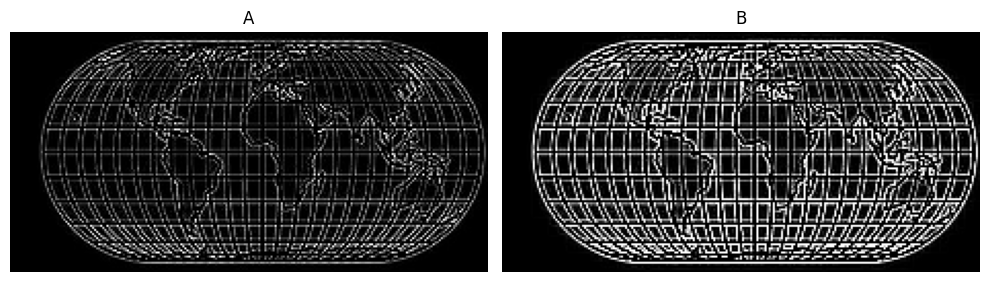

In [31]:
from google.colab import drive
import cv2
import numpy as np
from matplotlib import pyplot as plt

drive.mount('/content/drive')

image = cv2.imread('/content/drive/My Drive/traidat_small.png', cv2.IMREAD_GRAYSCALE)

a = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

b = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

edge_a = cv2.filter2D(image, -1, a)
edge_b = cv2.filter2D(image, -1, b)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(edge_a, cmap='gray'), plt.title('A'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(edge_b, cmap='gray'), plt.title('B'), plt.axis('off')
plt.tight_layout()
plt.show()
